In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
sb.set(style='whitegrid', color_codes=True)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [4]:
data=pd.read_csv('voice.csv')

In [5]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [6]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

### Detect ouliers 

In [7]:
def cal_limit(feature):
    q1,q3=data[feature].quantile([0.25,0.75])
    iqr=q3-q1
    rang=1.5*iqr
    return(q1-rang,q3+rang)

def plot(feature):
    fig,axes=plt.subplots(1,2)
    sb.boxplot(data=data,x=feature,ax=axes[0])
    sb.distplot(a=data[feature],ax=axes[1])
    fig.set_size_inches(15,5)
    
    lower,upper=cal_limit(feature)
    l=[data[feature] for i in data[feature] if i>lower and i<upper]
    print("Number of data points reamining if outlier removed" , len(l))

Number of data points reamining if outlier removed 3104


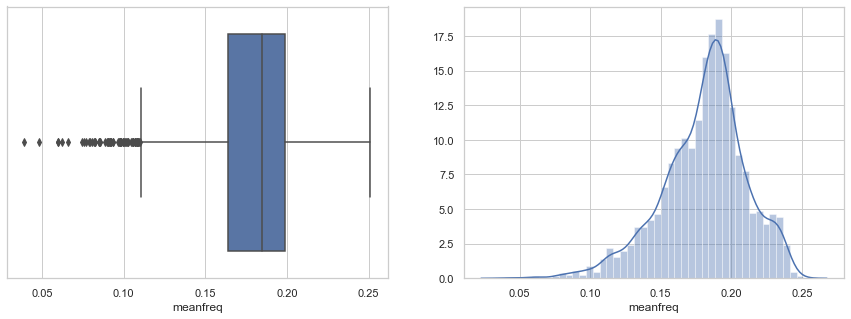

In [8]:
plot('meanfreq')

### Bivariate Analysis 

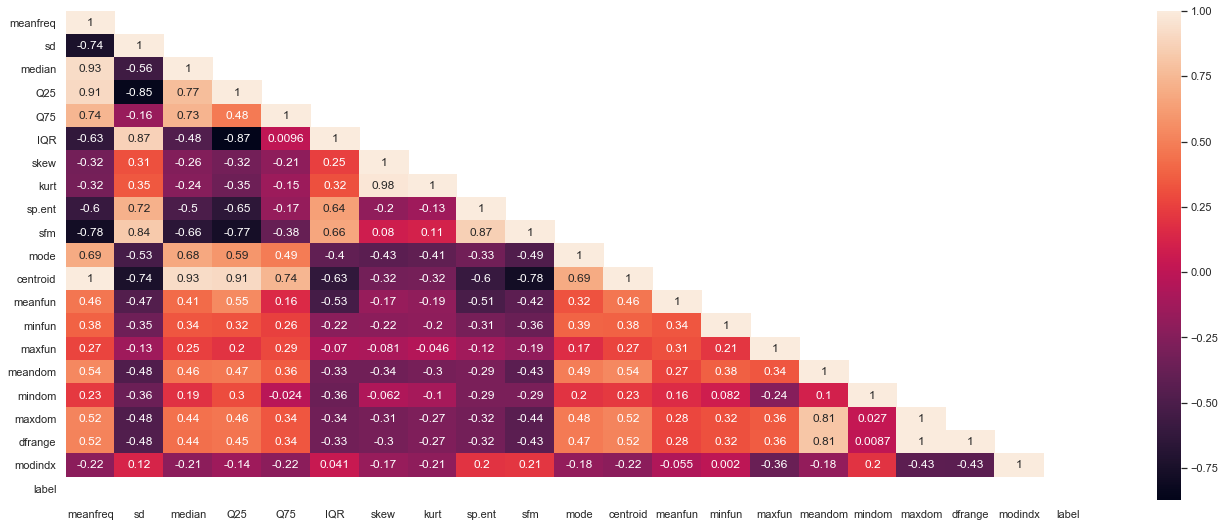

In [11]:
temp=[]
for i in data.label:
    if i=='male':
        temp.append(1)
    else:
        temp.append(0)
data['label']=temp

## Correlation matrix

cor_mat=data[:].corr()   
mask= np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(23,9)
sb.heatmap(data=cor_mat,mask=mask,square=False,annot=True ,cbar=True)

In [59]:
data.drop('centroid',axis=1,inplace=True)

In [60]:
for col in data.columns:
    lower,upper= cal_limit(col)
    data=data[(data[col]>lower) & (data[col]<upper)] 
data.shape

(1636, 20)

In [61]:
temp_data=data.copy()
temp_data.drop(['skew','kurt','mindom','maxdom'],axis=1,inplace=True)
temp_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,dfrange,modindx,label
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,5.476562,0.208274,1
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,0.963181,0.738307,0.112555,0.110132,0.017112,0.253968,0.298222,2.718750,0.125160,1
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,0.967573,0.762638,0.086197,0.105945,0.026230,0.266667,0.479620,5.304688,0.123992,1
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,0.970723,0.770992,0.219103,0.096729,0.017957,0.250000,0.336476,2.156250,0.148272,1


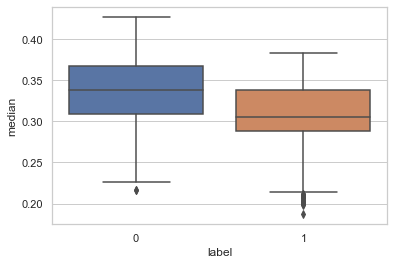

In [64]:
temp_data['meanfreq']=temp_data['meanfreq'].apply(lambda x:x*2)
temp_data['median']=temp_data['meanfreq']+temp_data['mode']
temp_data['median']=temp_data['median'].apply(lambda x:x/3)
sb.boxplot(data=temp_data,y='median',x='label')

In [66]:
temp_data['pear_skew']=temp_data['meanfreq']-temp_data['mode']
temp_data['pear_skew']=temp_data['pear_skew']/temp_data['sd']

In [68]:
scaler=StandardScaler()
scale=scaler.fit_transform(temp_data.drop('label',axis=1))
X=scale
Y=data['label']

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=1)


In [71]:
models=[RandomForestClassifier(), DecisionTreeClassifier()]
model_name=['RandomForestClassifier','DecisionTreeClassifier']
acc=[]
d={}
for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc.append(accuracy_score(pred,y_test))
    
d={'Modelling Algo ': model_name,"accuracy":acc}

In [72]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,accuracy
0,RandomForestClassifier,0.966463
1,DecisionTreeClassifier,0.960366


### Parameter Tuning 

In [91]:
param_grid = {
    'n_estimators':[200,500],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[4,5,6,7,8],
    'criterion':['gini','entropy']
}
cv_rfc = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,scoring='accuracy',cv=5)
cv_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [92]:
cv_rfc.best_param 

AttributeError: 'GridSearchCV' object has no attribute 'best_param'